# Random Forest Model interpretation

In [33]:
%load_ext autoreload
%autoreload 2
# reloads modules automatically before entering 
# the execution of code typed at the IPython prompt.


# draw plots in the notebook
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
# import libraries 
from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

In [35]:
set_plot_sizes(12,14,16)

We can create a variable PATH for where our project files such as csv file will be stored to make our work easier. The PATH will be different based on where your files are.

In [36]:
PATH = "/media/muoki/data/documents/code_training/portfolio/DataScienceProjects/fastai_Intro_ml/"

<h4>Loading the data.</h4>
<p>We will use a feather formart that we had earlier saved. Otherwise we can use pandas to read the csv file.</p>

In [37]:
import feather
df_raw = feather.read_dataframe(f'{PATH}tmp/bulldozers-raw')

In [38]:
# incase you don't have the feather formart
# df_raw = pd.read_csv(f'{PATH}Train.csv', low_memory=False, 
  #                   parse_dates=["saledate"])

In [39]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')

In [40]:
def split_vals(a,n): 
    return a[:n], a[n:]


n_valid = 12000
n_trn = len(df_trn)-n_valid
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
raw_train, raw_valid = split_vals(df_raw, n_trn)

In [41]:
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [42]:
df_raw

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,2,521D,...,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,2,950FII,...,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,0,226,...,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,0,PC120-6E,...,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,1,S175,...,23,3,204,False,False,False,False,False,False,1248307200
5,1139255,10.184900,1001274,4605,121,3.0,2004,508.0,2,310G,...,18,3,353,False,False,False,False,False,False,1229558400
6,1139256,9.952278,772701,1937,121,3.0,1993,11540.0,0,790ELC,...,26,3,239,False,False,False,False,False,False,1093478400
7,1139261,10.203592,902002,3539,121,3.0,2001,4883.0,0,416D,...,17,3,321,False,False,False,False,False,False,1132185600
8,1139272,9.975808,1036251,36003,121,3.0,2008,302.0,2,430HAG,...,27,3,239,False,False,False,False,False,False,1251331200
9,1139275,11.082143,1016474,3883,121,3.0,1000,20700.0,1,988B,...,9,3,221,False,False,False,False,False,False,1186617600


# Confidence based on tree variance

In [43]:
set_rf_samples(50000)

a subset will be both faster, and also provide better interpretability (since an overfit model will not provide much variance across trees).

In [44]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 49.3 s, sys: 1.71 s, total: 51 s
Wall time: 19.9 s
[0.20591528800877798, 0.24846290064372398, 0.9113840272040163, 0.889751909545525, 0.8943340473855841]


In [45]:
%time preds = np.stack([t.predict(X_valid) for t in m.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 1.47 s, sys: 64.2 ms, total: 1.53 s
Wall time: 1.53 s


(9.320600597601011, 0.3767811113447173)

In [46]:
def get_preds(t): 
    return t.predict(X_valid)
%time preds = np.stack(parallel_trees(m, get_preds))
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 135 ms, sys: 144 ms, total: 279 ms
Wall time: 1.01 s


(9.320600597601011, 0.3767811113447173)

In [47]:
?parallel_trees


different trees are giving different estimates this this auction. In order to see how prediction confidence varies, we can add this into our dataset.

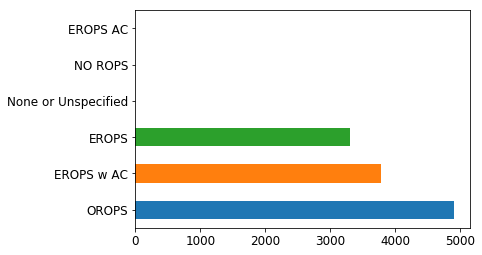

In [48]:
x = raw_valid.copy()
x['pred_std'] = np.std(preds, axis=0) #create a column for std of prediction
x['pred'] = np.mean(preds, axis=0) # create a column for mean of preds
x.Enclosure.value_counts().plot.barh();

In [49]:
flds = ['Enclosure', 'SalePrice', 'pred', 'pred_std']
enc_summ = x[flds].groupby('Enclosure', as_index=False).mean()
enc_summ

,Enclosure,SalePrice,pred,pred_std
0,EROPS,9.849178,9.839262,0.277823
1,EROPS AC,NaN,NaN,NaN
2,EROPS w AC,10.623971,10.577705,0.270116
3,NO ROPS,NaN,NaN,NaN
4,None or Unspecified,NaN,NaN,NaN
5,OROPS,9.682064,9.680364,0.226335


sales and pred mean are close

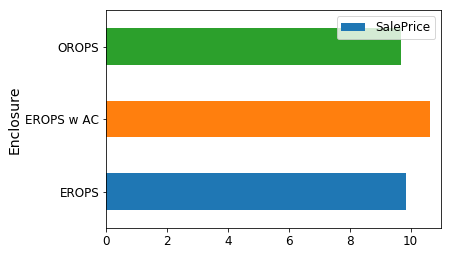

In [50]:
enc_summ = enc_summ[~pd.isnull(enc_summ.SalePrice)]
enc_summ.plot('Enclosure', 'SalePrice', 'barh', xlim=(0,11));

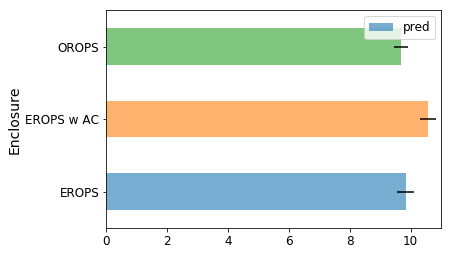

In [51]:
enc_summ.plot('Enclosure', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0,11));

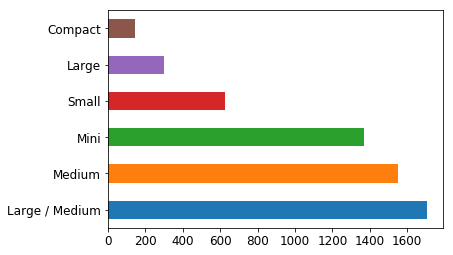

In [52]:
raw_valid.ProductSize.value_counts().plot.barh();

In [53]:
flds = ['ProductSize', 'SalePrice', 'pred', 'pred_std']
summ = x[flds].groupby(flds[0]).mean()
summ

,SalePrice,pred,pred_std
ProductSize,,,
Compact,9.735093,9.874126,0.364323
Large,10.470589,10.367310,0.369600
Large / Medium,10.691871,10.655161,0.299098
Medium,10.681511,10.615283,0.291637
Mini,9.535147,9.565951,0.255090
Small,10.324448,10.314087,0.320402


In [54]:
(summ.pred_std/summ.pred).sort_values(ascending=False)

ProductSize
Compact           0.036897
Large             0.035651
Small             0.031065
Large / Medium    0.028071
Medium            0.027473
Mini              0.026666
dtype: float64

# Feature importance
this tells us which columns matter

In [55]:
fi = rf_feat_importance(m, df_trn); fi[:10]

,cols,imp
5,YearMade,0.173906
37,Coupler_System,0.117344
13,ProductSize,0.096412
14,fiProductClassDesc,0.073931
2,ModelID,0.055596
63,saleElapsed,0.050175
10,fiSecondaryDesc,0.046370
19,Enclosure,0.033497
8,fiModelDesc,0.033360
38,Grouser_Tracks,0.032019


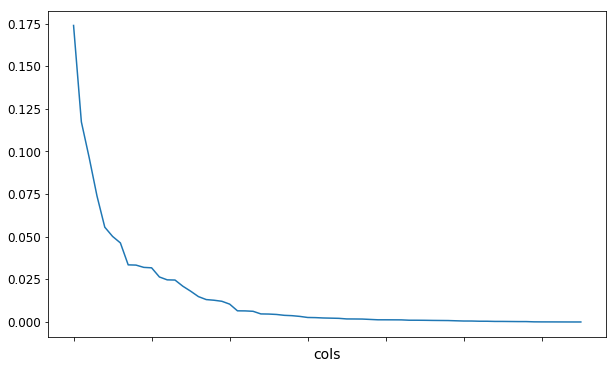

In [56]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

we can plot columns in the orderof importance

In [57]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

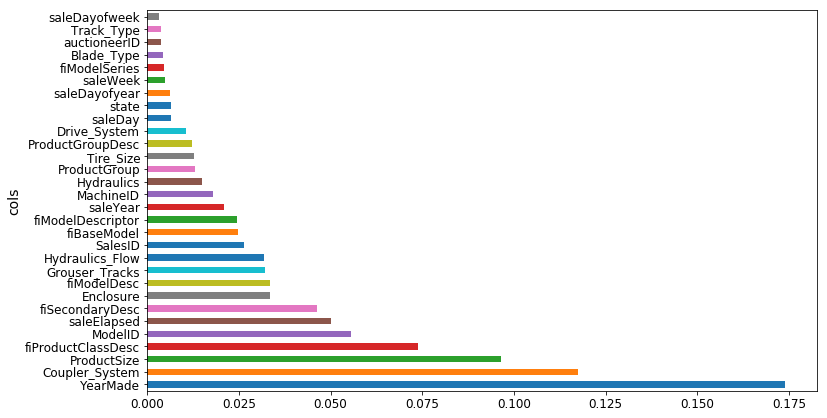

In [58]:
plot_fi(fi[:30])

In [59]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

24

We removed columns with an importance of less than 0.005 

In [60]:
df_keep = df_trn[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [61]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.2065844162033087, 0.24569217243785882, 0.9108071706950648, 0.8921970575839908, 0.8944894122752968]


The R^2 didn't change as the less important columns didn't have alot of impact. It also addresses colinearity

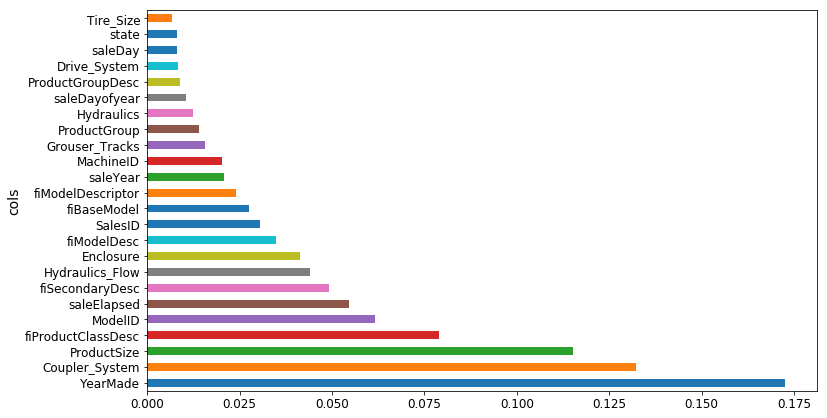

In [62]:
fi = rf_feat_importance(m, df_keep)
plot_fi(fi)